In [3]:
import sys
sys.path.append('/media/analysis-code/figurefirst/')
%pylab inline
#%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42
from IPython.display import SVG, display
import figurefirst as fifi
import group_data as gd
import h5py

Populating the interactive namespace from numpy and matplotlib


In [38]:
trial_db = h5py.File('../02_imaging_post_processing/trial_db.hdf5')

In [39]:
sfix_mask_22H05 = np.array(trial_db['trial_names']) == 'stripe_fix'
sfix_mask_22H05 &= (np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR22H05-GAL4}attP2/+') 

sfix_mask_39E01 = np.array(trial_db['trial_names']) == 'stripe_fix'
sfix_mask_39E01 &= (np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+')
#| \(np.array(trial_db['genotypes']) == '+;P{20XUAS-IVS-GCaMP6f}attP40/+;P{y[+t7.7] w[+mC]=GMR39E01-GAL4}attP2/+')

In [40]:
sfix_flies_22H05 = np.array(trial_db['fly_numbers'])[sfix_mask_22H05]
sfix_flies_39E01 = np.array(trial_db['fly_numbers'])[sfix_mask_39E01]

In [41]:
fly_set_22H05 = set(sfix_flies_22H05) # flies that have good stripe fixation
fly_set_39E01 = set(sfix_flies_39E01)

In [42]:
GMR22H05_hists = list()
for fly in fly_set_22H05:
    print fly
    fly_mask = np.array(trial_db['fly_numbers']) == fly
    mask = sfix_mask_22H05 & fly_mask
    data = np.array(trial_db['Xpos'])[mask]
    GMR22H05_hists.append(np.histogram((data.ravel()[np.isfinite(data.ravel())]/10.0)*96,bins =96,normed = True)[0])

GMR39E01_hists = list()
for fly in fly_set_39E01:
    print fly
    fly_mask = np.array(trial_db['fly_numbers']) == fly
    mask = sfix_mask_39E01 & fly_mask
    data = np.array(trial_db['Xpos'])[mask]
    GMR39E01_hists.append(np.histogram((data.ravel()[np.isfinite(data.ravel())]/10.0)*96,bins =96,normed = True)[0])

656
657
658
659
660
661
662
455
456
308
309
310
311
312
314
315
316
317
453
327
328
461
462
463
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
483
484
485
486
488
489
490
491
492
493
494
495
496
497
498
500
501
502
318
319
320
321
322
323
324
325
329
330
331
332
333
334
335
336
988
989
990
991
992
993
994
995
996
997
998
999
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018


In [58]:
def resample_hist(hist_array,reps = 100):
    resamples = list()
    n = np.shape(hist_array)[0]
    iar = np.arange(n)
    for rep in range(reps):
        idxs = np.random.choice(iar,n)
        resamples.append(np.mean(hist_array[idxs],axis = 0))
    mn = np.mean(hist_array,axis = 0)
    ub = np.percentile(resamples,97.5,axis = 0)
    lb = np.percentile(resamples,2.25,axis = 0)
    mn = np.hstack((mn,mn[0]))
    ub = np.hstack((ub,ub[0]))
    lb = np.hstack((lb,lb[0]))
    return mn,ub,lb

In [71]:
mn_22H05,ub_22H05,lb_22H05 = resample_hist(np.array(GMR22H05_hists),reps = 10000)
mn_39E01,ub_39E01,lb_39E01 = resample_hist(np.array(GMR39E01_hists),reps = 10000)

In [72]:
rad_per_pix = deg2rad(360/96.0)

In [73]:
front_pos = 67

In [74]:
rad_array = np.linspace(0,2*pi,96)
rad_array -= front_pos*rad_per_pix
rad_array = np.hstack((rad_array,rad_array[0]))

In [75]:
print np.max(mn_22H05)
print np.max(mn_39E01)

0.0173688202042
0.0208796601923


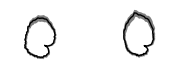

In [81]:
layout = fifi.FigureLayout('figure_1_layout.svg')
layout.make_mplfigures()
layout.axes['GMR22H05_fix'].plot(rad_array,mn_22H05,color = 'k',clip_on = False)
layout.axes['GMR39E01_fix'].plot(rad_array,mn_39E01,color = 'k',clip_on = False)
layout.axes['GMR22H05_fix'].fill_between(rad_array,ub_22H05,lb_22H05,color = 'k',alpha = 0.5,clip_on = False,lw = 0)

layout.axes['GMR39E01_fix'].fill_between(rad_array,ub_39E01,lb_39E01,color = 'k',alpha = 0.5,clip_on = False,lw = 0)

layout.axes['GMR22H05_fix'].set_ybound(0,0.02)
layout.axes['GMR39E01_fix'].set_ybound(0,0.02)

layout.apply_mpl_methods()
fifi.mpl_functions.kill_all_spines(layout)
layout.set_layer_visibility('figure2',False)
layout.save('figure_1.svg')
display(SVG('figure_1.svg'))